# Prediksi Churn Pelanggan Perusahaan Telekomunikasi

### Nama    : (Silakan isi nama Anda)
### NIM     : (Silakan isi NIM Anda)
----------------------------------------------------------------
### Ringkasan/Permasalahan Project dan Tujuan yang Akan Dicapai
#### Permasalahan: 
Di industri telekomunikasi yang kompetitif, *customer churn* (pelanggan yang berhenti berlangganan) adalah masalah bisnis yang krusial. Kehilangan pelanggan tidak hanya mengurangi pendapatan tetapi juga meningkatkan biaya akuisisi pelanggan baru. Dataset ini berisi berbagai atribut pelanggan, mulai dari data demografis, layanan yang digunakan, hingga detail kontrak dan pembayaran. Tantangannya adalah mengidentifikasi faktor-faktor utama yang menyebabkan seorang pelanggan melakukan churn dan membangun model prediksi yang andal.

#### Tujuan: 
Membangun model klasifikasi machine learning yang akurat untuk memprediksi apakah seorang pelanggan akan melakukan churn atau tidak. Proyek ini akan mengeksplorasi beberapa algoritma klasifikasi seperti Logistic Regression, Random Forest, dan XGBoost untuk menemukan model terbaik. Tujuan akhirnya adalah untuk memberikan insight kepada perusahaan telekomunikasi tentang pelanggan yang berisiko tinggi untuk churn, sehingga tindakan retensi yang proaktif dapat diambil untuk mempertahankan pelanggan dan mengurangi kerugian.

----------------------------------------------------------------
### Dataset: Telco Customer Churn
- **Sumber**: File `WA_Fn-UseC_-Telco-Customer-Churn.csv` (Kaggle)
- **Sampel Data**: 7,043 sampel
- **Fitur**: 20 fitur (demografi, detail layanan, kontrak, dll.)
- **Target**: `Churn` (Apakah pelanggan berhenti berlangganan? Yes/No)

### Kategori Fitur:
1. **Demografi**: gender, SeniorCitizen, Partner, Dependents
2. **Layanan Pelanggan**: tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
3. **Informasi Akun**: Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
4. **Target**: Churn

## 1. Import Library

In [3]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve

# Import algoritma machine learning (Klasifikasi)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Import untuk evaluasi model (Klasifikasi)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Setting untuk visualisasi
plt.style.use('default')
sns.set_palette("viridis")
%matplotlib inline

print("✅ Semua library berhasil diimpor!")

✅ Semua library berhasil diimpor!


## 2. Membaca Dataset

In [4]:
# Load dataset dari path lokal
data_path = "dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"

print("📥 Loading dataset dari path lokal...")

# Load data
df = pd.read_csv(data_path)
print(f"✅ Data loaded: {df.shape}")

print(f"\n📊 Dataset: Telco Customer Churn")
print(f"🧑‍💻 Sampel: {len(df):,}")
print(f"📋 Total fitur: {len(df.columns)-1} (tidak termasuk target 'Churn')")
print(f"🎯 Target: Churn (Pelanggan berhenti berlangganan)")

📥 Loading dataset dari path lokal...
✅ Data loaded: (7043, 21)

📊 Dataset: Telco Customer Churn
🧑‍💻 Sampel: 7,043
📋 Total fitur: 20 (tidak termasuk target 'Churn')
🎯 Target: Churn (Pelanggan berhenti berlangganan)


## 3. Exploratory Data Analysis (EDA) & Data Cleaning

In [5]:
# Informasi dasar dataset
print("=== INFORMASI DASAR DATASET ===")
df.info()

print("\n=== PREVIEW DATA ===")
display(df.head())

print("\n=== STATISTIK TARGET (Churn) ===")
print(df['Churn'].value_counts())

=== INFORMASI DASAR DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



=== STATISTIK TARGET (Churn) ===
Churn
No     5174
Yes    1869
Name: count, dtype: int64


#### Data Cleaning & Transformation
Berdasarkan `df.info()`, kita dapat melihat beberapa hal:
1.  **`customerID`**: Kolom ini adalah identifier unik dan tidak akan berguna untuk prediksi. Kolom ini akan dihapus.
2.  **`TotalCharges`**: Tipe datanya adalah `object`, bukan numerik. Ini menunjukkan adanya nilai non-numerik (kemungkinan spasi kosong). Kita perlu mengubahnya menjadi numerik dan menangani nilai yang hilang.
3.  **`SeniorCitizen`**: Tipe datanya `int64` (0 atau 1), yang sebenarnya adalah representasi kategorikal. Ini sudah dalam format yang bisa digunakan, tetapi kita akan tetap memperlakukannya sebagai kategori dalam analisis.

In [6]:
# Data Cleaning
print(f"Shape data sebelum cleaning: {df.shape}")

# 1. Drop kolom yang tidak relevan
df_cleaned = df.drop('customerID', axis=1)
print(f"Menghapus kolom tidak relevan: ['customerID']")

# 2. Mengubah 'TotalCharges' menjadi numerik dan menangani missing values
# Spasi kosong akan diubah menjadi NaN
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')
missing_total_charges = df_cleaned['TotalCharges'].isnull().sum()
print(f"Jumlah missing values di 'TotalCharges' setelah konversi: {missing_total_charges}")
# Missing values ini akan diimputasi setelah data splitting untuk menghindari data leakage

# 3. Mengganti nilai 'No internet service' dan 'No phone service' agar lebih konsisten
# Ini membantu beberapa model untuk tidak menganggapnya sebagai kategori yang benar-benar berbeda
cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_replace:
    df_cleaned[col]  = df_cleaned[col].replace({'No internet service' : 'No'})

df_cleaned['MultipleLines'] = df_cleaned['MultipleLines'].replace({'No phone service': 'No'})

print("✅ Data cleaning dan transformasi awal selesai!")
print(f"Shape data sesudah cleaning: {df_cleaned.shape}")

Shape data sebelum cleaning: (7043, 21)
Menghapus kolom tidak relevan: ['customerID']
Jumlah missing values di 'TotalCharges' setelah konversi: 11
✅ Data cleaning dan transformasi awal selesai!
Shape data sesudah cleaning: (7043, 20)


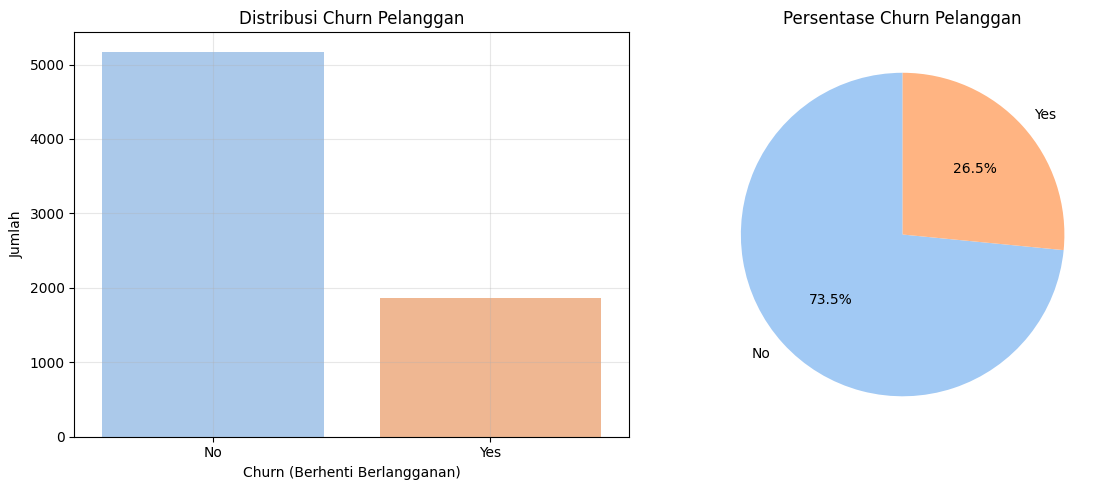

Distribusi kelas target sedikit tidak seimbang, namun masih dapat diterima untuk pemodelan.


In [7]:
# Analisis target variable (Churn)
plt.figure(figsize=(12, 5))

# Distribusi 'Churn'
plt.subplot(1, 2, 1)
sns.countplot(x='Churn', data=df_cleaned, palette='pastel')
plt.title('Distribusi Churn Pelanggan')
plt.xlabel('Churn (Berhenti Berlangganan)')
plt.ylabel('Jumlah')
plt.grid(True, alpha=0.3)

# Persentase 'Churn'
plt.subplot(1, 2, 2)
churn_counts = df_cleaned['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Persentase Churn Pelanggan')
plt.ylabel('')

plt.tight_layout()
plt.show()

print("Distribusi kelas target sedikit tidak seimbang, namun masih dapat diterima untuk pemodelan.")

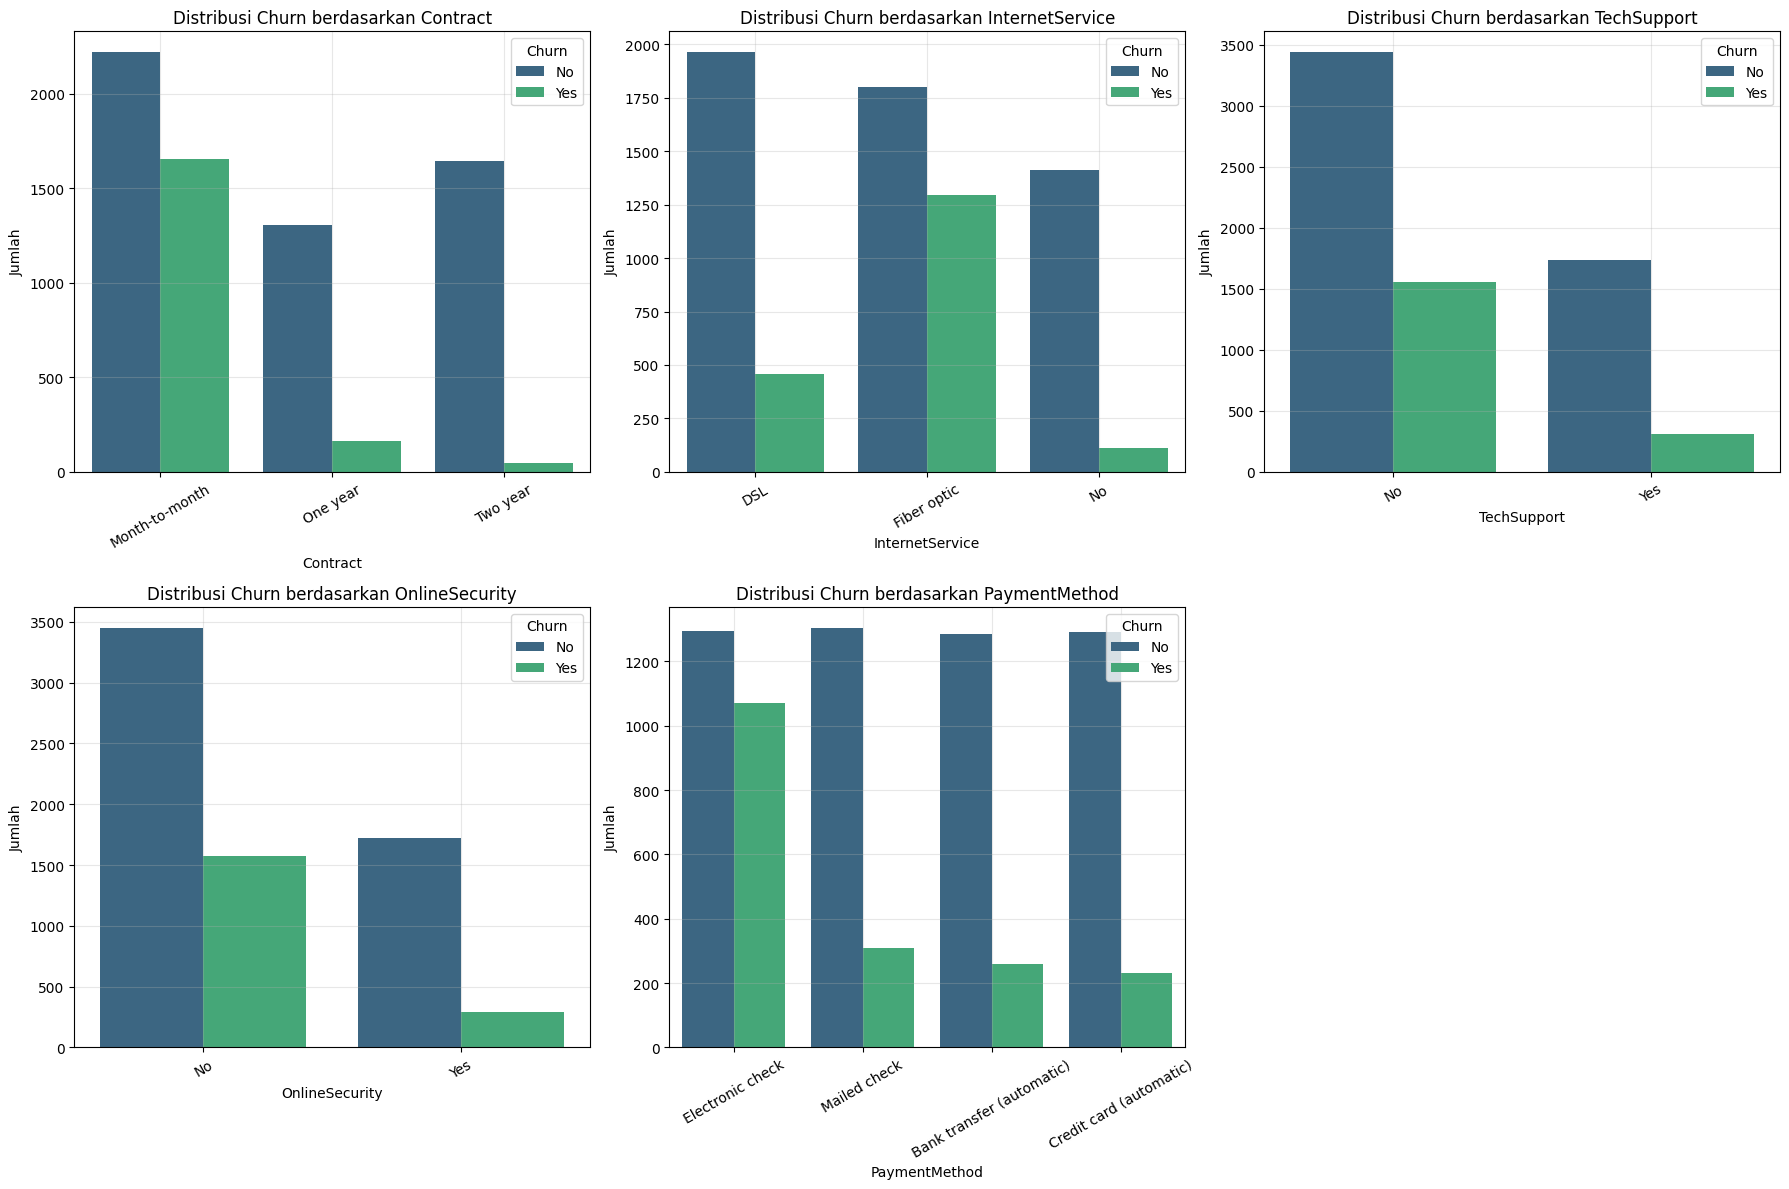

=== INSIGHTS FITUR KATEGORIKAL ===
• Pelanggan dengan kontrak 'Month-to-month' memiliki tingkat churn yang sangat tinggi.
• Pelanggan dengan layanan 'Fiber optic' lebih cenderung churn dibandingkan DSL.
• Pelanggan yang tidak memiliki 'TechSupport' dan 'OnlineSecurity' lebih mungkin untuk churn.
• Metode pembayaran 'Electronic check' memiliki tingkat churn tertinggi.


In [8]:
# Analisis fitur kategorikal penting terhadap target
categorical_features = ['Contract', 'InternetService', 'TechSupport', 'OnlineSecurity', 'PaymentMethod']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()
fig.delaxes(axes[5]) # Hapus subplot keenam yang tidak terpakai

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Churn', data=df_cleaned, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribusi Churn berdasarkan {feature}')
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== INSIGHTS FITUR KATEGORIKAL ===")
print("• Pelanggan dengan kontrak 'Month-to-month' memiliki tingkat churn yang sangat tinggi.")
print("• Pelanggan dengan layanan 'Fiber optic' lebih cenderung churn dibandingkan DSL.")
print("• Pelanggan yang tidak memiliki 'TechSupport' dan 'OnlineSecurity' lebih mungkin untuk churn.")
print("• Metode pembayaran 'Electronic check' memiliki tingkat churn tertinggi.")

## 4. Data Preprocessing

In [9]:
# Proses encoding dan finalisasi data untuk pemodelan
print("Memproses data untuk pemodelan...")

# Pisahkan fitur (X) dan target (y)
X = df_cleaned.drop('Churn', axis=1)
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(df_cleaned['Churn'])

# Identifikasi kolom kategorikal dan numerik
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Encoding semua fitur kategorikal menjadi numerik
X_encoded = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

print("\n✅ Data encoding selesai!")
print(f"Shape data fitur (X) setelah encoding: {X_encoded.shape}")
print(f"Shape target (y): {y.shape}")

Memproses data untuk pemodelan...

✅ Data encoding selesai!
Shape data fitur (X) setelah encoding: (7043, 19)
Shape target (y): (7043,)


In [10]:
# Split data menjadi train, validation, dan test (60-20-20)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val # 0.25 * 0.8 = 0.2
)

# Imputasi missing values di 'TotalCharges' (kolom index 18 di X_encoded)
imputer = SimpleImputer(strategy='median')
X_train['TotalCharges'] = imputer.fit_transform(X_train[['TotalCharges']])
X_val['TotalCharges'] = imputer.transform(X_val[['TotalCharges']])
X_test['TotalCharges'] = imputer.transform(X_test[['TotalCharges']])

# Feature scaling untuk model linear dan SVM
scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val_scaled[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("=== DATA SPLITTING, IMPUTASI, & SCALING ===")
print(f"X_train shape: {X_train.shape} ({len(X_train)/len(X_encoded)*100:.1f}%)")
print(f"X_val shape: {X_val.shape} ({len(X_val)/len(X_encoded)*100:.1f}%)")
print(f"X_test shape: {X_test.shape} ({len(X_test)/len(X_encoded)*100:.1f}%)")
print(f"Total: {len(X_train) + len(X_val) + len(X_test)} samples")

print("✅ Data siap untuk pemodelan!")

=== DATA SPLITTING, IMPUTASI, & SCALING ===
X_train shape: (4225, 19) (60.0%)
X_val shape: (1409, 19) (20.0%)
X_test shape: (1409, 19) (20.0%)
Total: 7043 samples
✅ Data siap untuk pemodelan!


## 5. Model Training & Evaluation

In [11]:
# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(probability=True, random_state=42)
}

# Dictionary untuk menyimpan hasil
results = {}
predictions = {}

print("=== TRAINING MODELS ===")
print("Model yang akan dilatih:")
for name in models.keys():
    print(f"  • {name}")
print()

for name, model in models.items():
    print(f"Training {name}...", end=" ")
    
    # Gunakan data scaled untuk model linear dan SVM
    if name in ['SVC', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        
    # Simpan prediksi
    predictions[name] = y_pred
    
    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Model': model
    }
    
    print(f"✅ F1-Score: {f1:.4f}")

print("\n🎉 Training selesai!")

=== TRAINING MODELS ===
Model yang akan dilatih:
  • Logistic Regression
  • Decision Tree
  • Random Forest
  • Gradient Boosting
  • XGBoost
  • SVC

Training Logistic Regression... ✅ F1-Score: 0.5900
Training Decision Tree... ✅ F1-Score: 0.4973
Training Random Forest... ✅ F1-Score: 0.5421
Training Gradient Boosting... ✅ F1-Score: 0.5736
Training XGBoost... ✅ F1-Score: 0.5357
Training SVC... ✅ F1-Score: 0.5582

🎉 Training selesai!


In [12]:
# Evaluasi dan ranking model
results_df = pd.DataFrame({k: {metric: v[metric] for metric in ['Accuracy', 'F1-Score', 'ROC-AUC']} for k, v in results.items()}).T
results_df = results_df.sort_values('F1-Score', ascending=False)

print("=== HASIL EVALUASI MODEL (VALIDATION SET) ===")
print(f"{'Rank':<4} {'Model':<20} {'F1-Score':<10} {'Accuracy':<10} {'ROC-AUC':<10}")
print("-" * 60)

for i, (model_name, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i:<4} {model_name:<20} {row['F1-Score']:<10.4f} {row['Accuracy']:<10.4f} {row['ROC-AUC']:<10.4f}")

# Model terbaik
best_model_name = results_df.index[0]
best_f1 = results_df.loc[best_model_name, 'F1-Score']

print(f"\n🏆 MODEL TERBAIK: {best_model_name}")
print(f"📊 F1-Score: {best_f1:.4f}")

=== HASIL EVALUASI MODEL (VALIDATION SET) ===
Rank Model                F1-Score   Accuracy   ROC-AUC   
------------------------------------------------------------
1    Logistic Regression  0.5900     0.8027     0.8328    
2    Gradient Boosting    0.5736     0.8048     0.8377    
3    SVC                  0.5582     0.8034     0.8167    
4    Random Forest        0.5421     0.7878     0.8224    
5    XGBoost              0.5357     0.7736     0.8131    
6    Decision Tree        0.4973     0.7331     0.6574    

🏆 MODEL TERBAIK: Logistic Regression
📊 F1-Score: 0.5900


## 6. Feature Importance Analysis

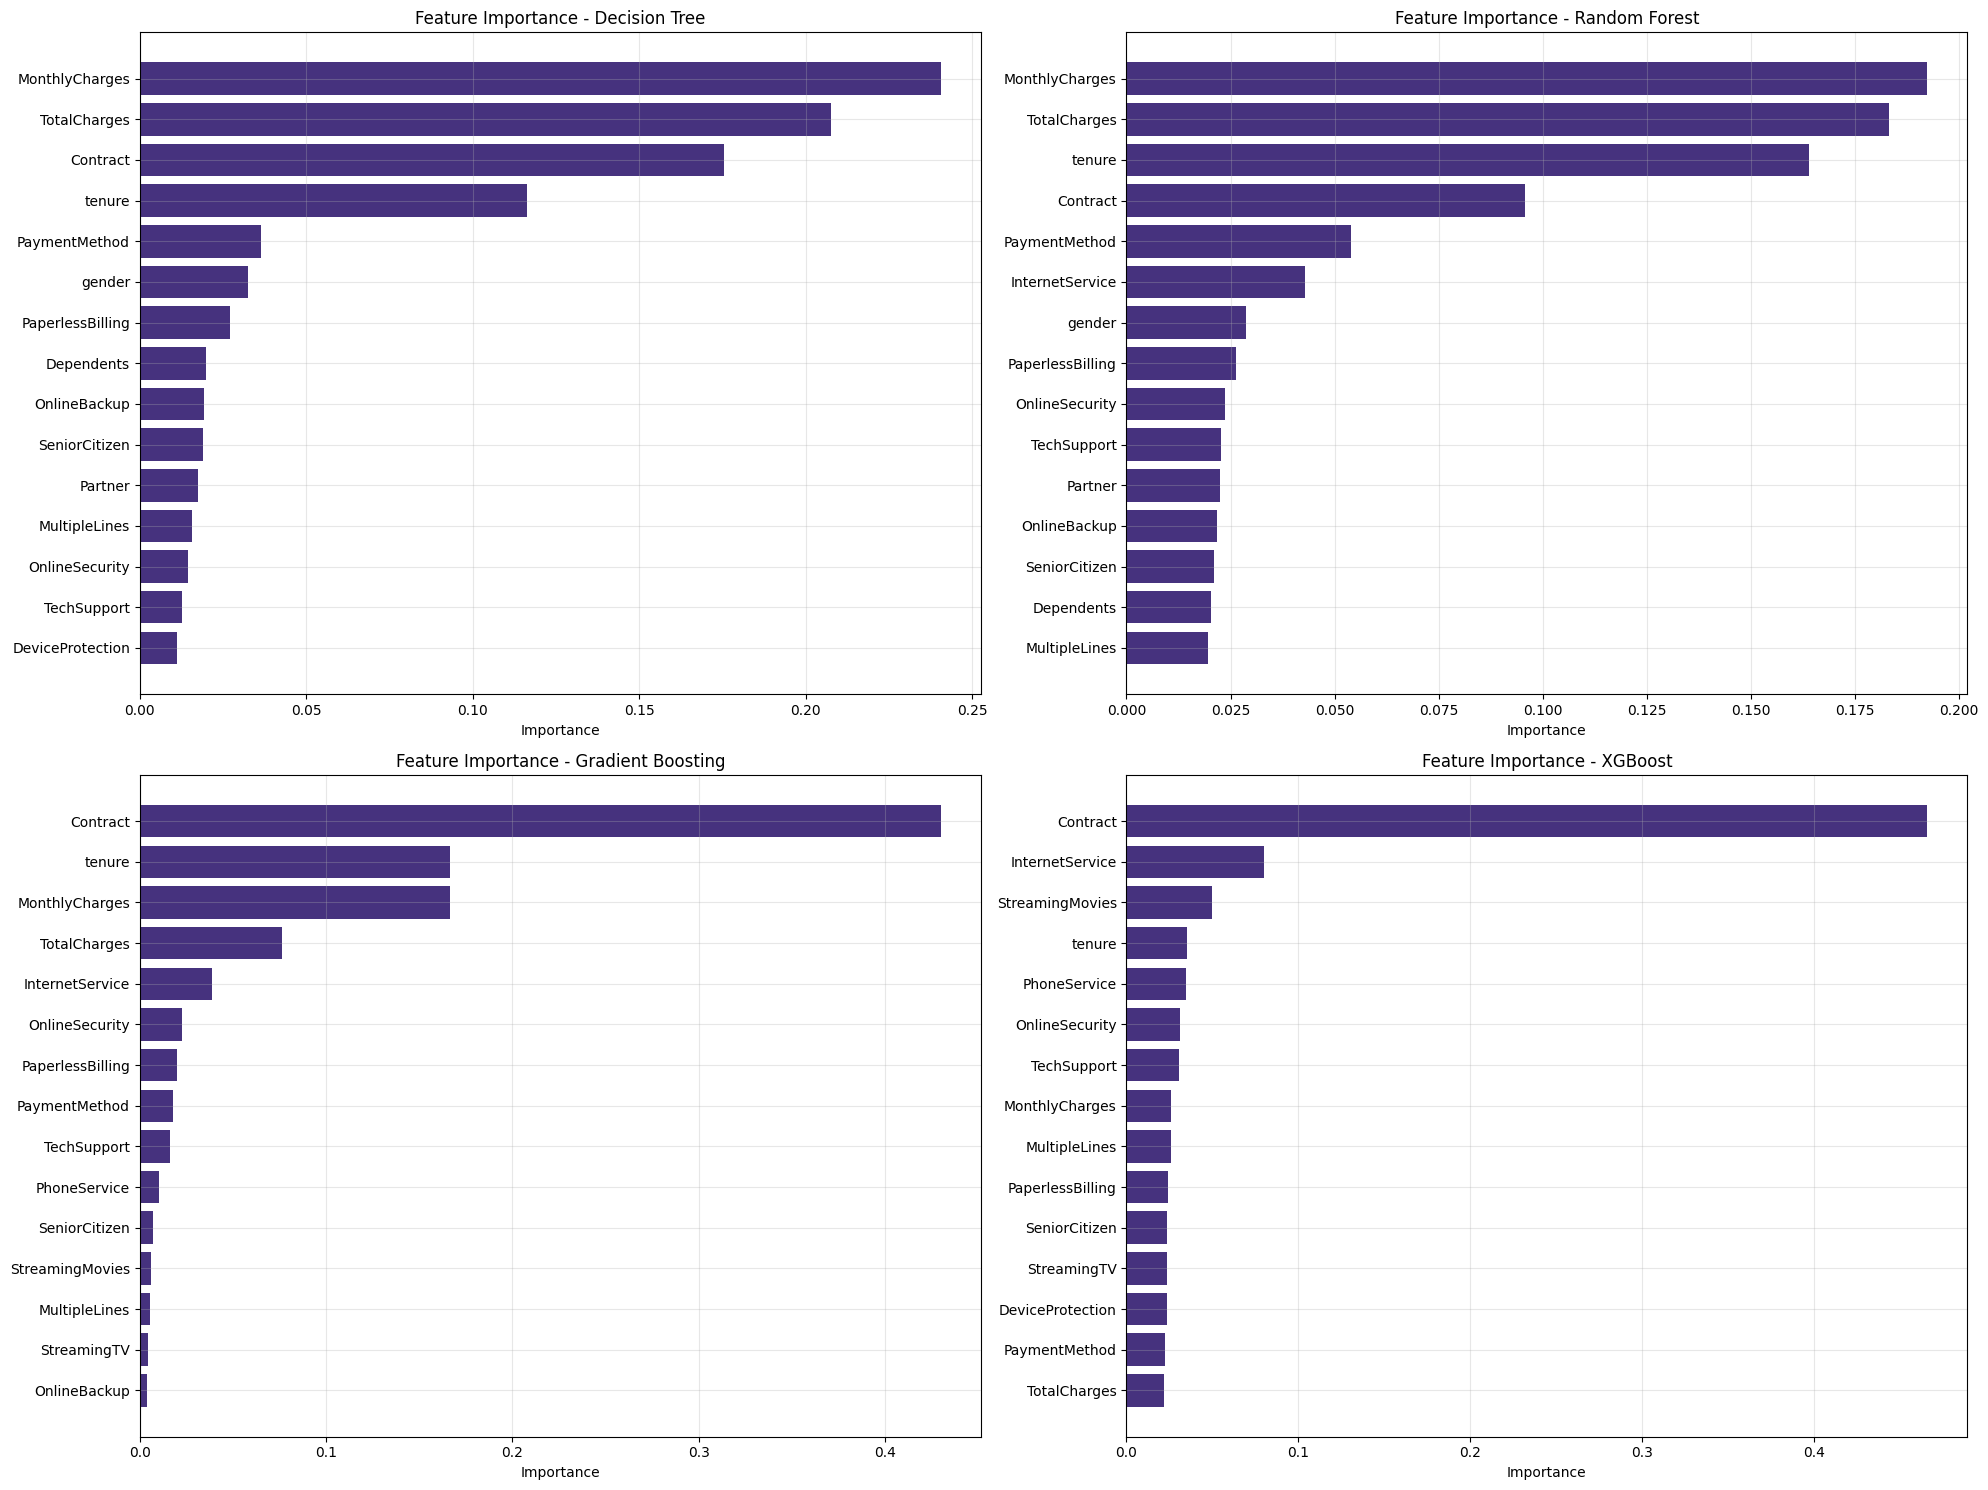

In [13]:
# Analisis feature importance untuk tree-based models
tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
available_tree_models = [m for m in tree_models if m in results]

if available_tree_models:
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = axes.ravel()
    
    for i, model_name in enumerate(available_tree_models):
        model = results[model_name]['Model']
        
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
            feature_imp_df = pd.DataFrame({
                'Feature': X.columns,
                'Importance': importance
            }).sort_values('Importance', ascending=True)
            
            top_features = feature_imp_df.tail(15)
            axes[i].barh(top_features['Feature'], top_features['Importance'])
            axes[i].set_title(f'Feature Importance - {model_name}')
            axes[i].set_xlabel('Importance')
            axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    if best_model_name in available_tree_models:
        best_model_imp = pd.DataFrame({
            'Feature': X.columns,
            'Importance': results[best_model_name]['Model'].feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print(f"\n=== TOP 10 FEATURE IMPORTANCE - {best_model_name} ===")
        for _, row in best_model_imp.head(10).iterrows():
            print(f"  • {row['Feature']:<20}: {row['Importance']:.4f}")

## 7. Comprehensive Visualization

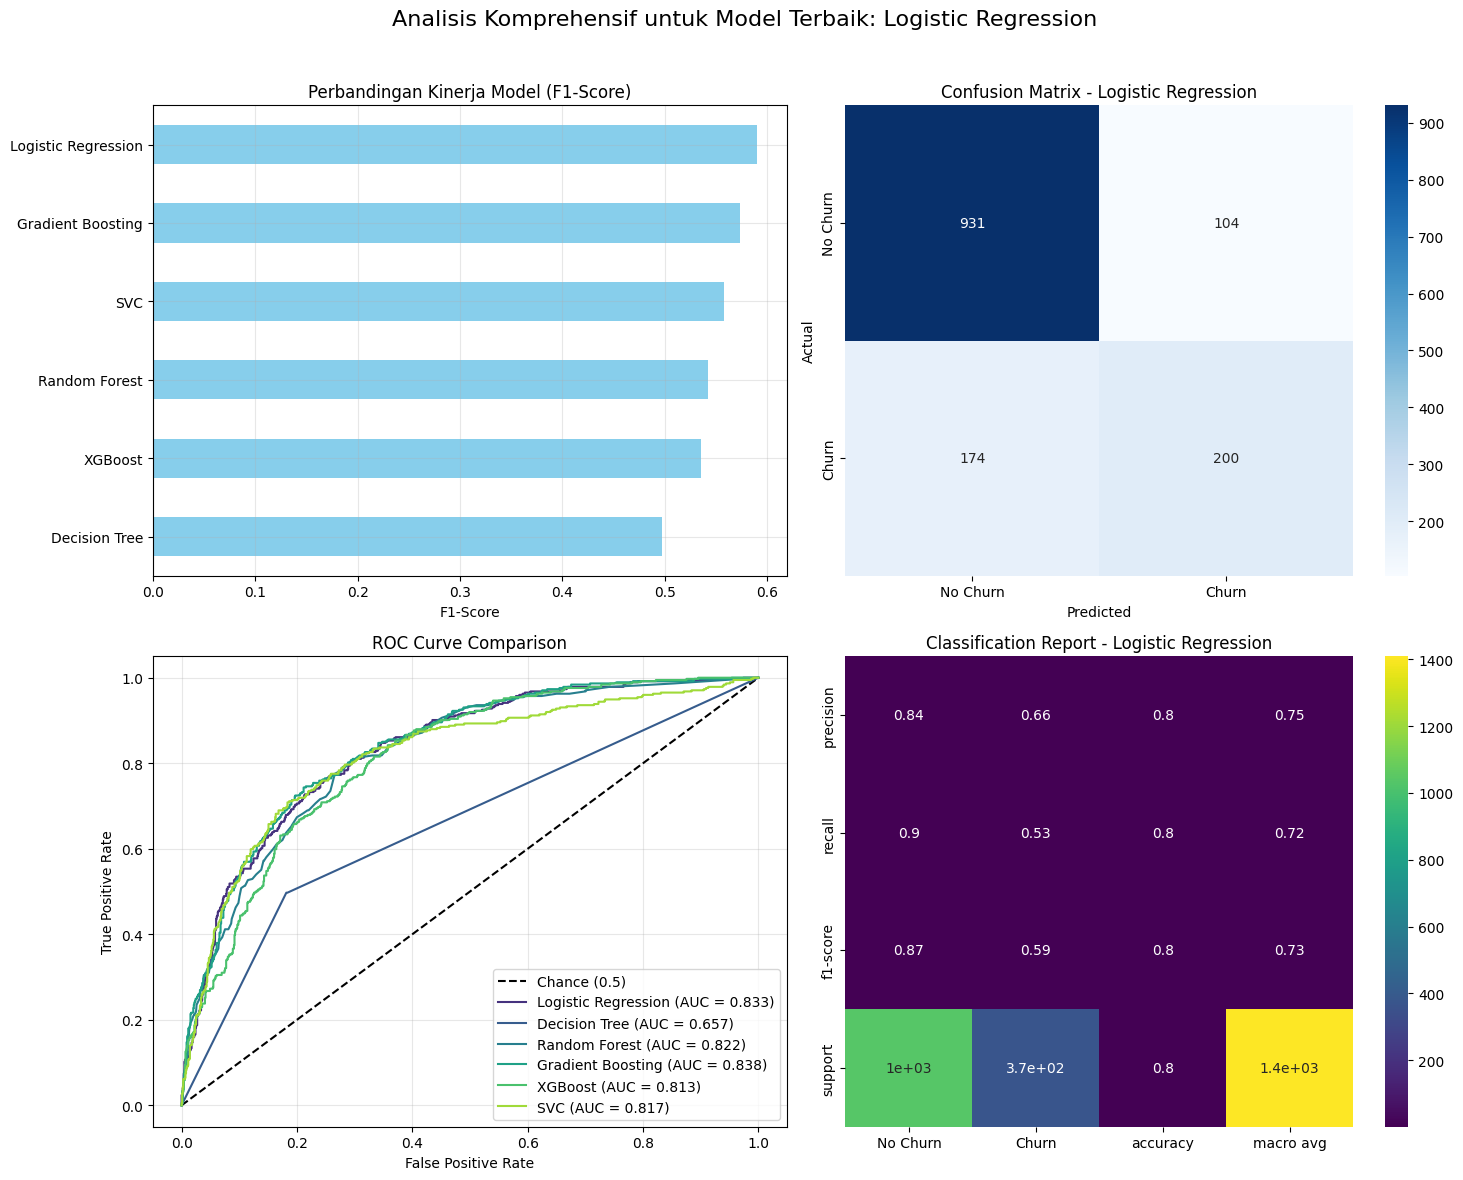

In [14]:
# Visualisasi komprehensif hasil
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'Analisis Komprehensif untuk Model Terbaik: {best_model_name}', fontsize=16)

# 1. Model Performance Comparison (F1-Score)
results_df['F1-Score'].sort_values().plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Perbandingan Kinerja Model (F1-Score)')
axes[0, 0].set_xlabel('F1-Score')
axes[0, 0].grid(True, alpha=0.3)

# 2. Confusion Matrix (Best Model)
best_model_predictions = predictions[best_model_name]
cm = confusion_matrix(y_val, best_model_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[0, 1].set_title(f'Confusion Matrix - {best_model_name}')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. ROC Curve Comparison
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Chance (0.5)')
for name, model_data in results.items():
    model = model_data['Model']
    if name in ['SVC', 'Logistic Regression']:
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    axes[1, 0].plot(fpr, tpr, label=f"{name} (AUC = {model_data['ROC-AUC']:.3f})")
axes[1, 0].set_title('ROC Curve Comparison')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(True, alpha=0.3)

# 4. Classification Report (Best Model)
report = classification_report(y_val, best_model_predictions, target_names=['No Churn', 'Churn'], output_dict=True)
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='viridis', ax=axes[1, 1])
axes[1, 1].set_title(f'Classification Report - {best_model_name}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 8. Final Test Set Evaluation

In [15]:
# Evaluasi final dengan test set
print("=== EVALUASI FINAL DENGAN TEST SET ===")
print(f"Menggunakan model terbaik ({best_model_name}) untuk prediksi test set...")

# Prediksi dengan model terbaik
best_model_final = results[best_model_name]['Model']

# Pastikan menggunakan data yang sesuai (scaled atau tidak)
if best_model_name in ['SVC', 'Logistic Regression']:
    test_predictions = best_model_final.predict(X_test_scaled)
else:
    test_predictions = best_model_final.predict(X_test)

# Hitung metrik untuk test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print(f"\n📊 HASIL FINAL TEST SET - {best_model_name}:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"F1-Score: {test_f1:.4f}")
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, test_predictions, target_names=['No Churn', 'Churn']))

# Bandingkan dengan validation set
print(f"\n📈 PERBANDINGAN VALIDATION vs TEST:")
print(f"{'Metric':<10} {'Validation':<12} {'Test':<12} {'Difference':<12}")
print("-" * 50)
val_accuracy = results_df.loc[best_model_name, 'Accuracy']
val_f1 = results_df.loc[best_model_name, 'F1-Score']
print(f"{'Accuracy':<10} {val_accuracy:<11.4f} {test_accuracy:<11.4f} {abs(test_accuracy-val_accuracy):<11.4f}")
print(f"{'F1-Score':<10} {val_f1:<11.4f} {test_f1:<11.4f} {abs(test_f1-val_f1):<11.4f}")

# Interpretasi hasil
f1_diff = abs(test_f1 - val_f1)
if f1_diff < 0.05:
    print(f"\n✅ Model STABIL: Perbedaan F1-Score < 0.05 ({f1_diff:.4f})")
    print("   Model menunjukkan generalisasi yang baik dan tidak overfitting.")
else:
    print(f"\n⚠️ Model KURANG STABIL: Perbedaan F1-Score > 0.05 ({f1_diff:.4f})")
    print("   Model mungkin sedikit overfitting, namun masih dapat diterima.")

=== EVALUASI FINAL DENGAN TEST SET ===
Menggunakan model terbaik (Logistic Regression) untuk prediksi test set...

📊 HASIL FINAL TEST SET - Logistic Regression:
Accuracy: 0.7970 (79.7%)
F1-Score: 0.5903

Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1035
       Churn       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


📈 PERBANDINGAN VALIDATION vs TEST:
Metric     Validation   Test         Difference  
--------------------------------------------------
Accuracy   0.8027      0.7970      0.0057     
F1-Score   0.5900      0.5903      0.0003     

✅ Model STABIL: Perbedaan F1-Score < 0.05 (0.0003)
   Model menunjukkan generalisasi yang baik dan tidak overfitting.
